In [1]:
# Dependencies
import json
import requests
import os
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
from oc_key import oc_key
from oc_key import g_key

gmaps.configure(api_key=g_key) 



In [2]:
# Load city list csv
city_list_toload = "../Resources/weather_city_final.csv"

city_list_df = pd.read_csv(city_list_toload)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp
0,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,71.01,63.00
1,"Newark, New Jersey",Newark,280463.0,40.735657,-74.172367,71.01,64.00
2,"Buffalo, New York",Buffalo,257518.0,42.886447,-78.878369,64.99,61.00
3,"Charlotte, North Carolina",Charlotte,841611.0,35.227087,-80.843127,69.01,66.00
4,"New York, New York",New York,8443713.0,40.712775,-74.005973,69.01,63.00
5,"Raleigh, North Carolina",Raleigh,457159.0,35.779590,-78.638179,72.00,68.00
6,"Durham, North Carolina",Durham,264310.0,35.994033,-78.898619,71.01,66.00
7,"Greensboro, North Carolina",Greensboro,288719.0,36.072635,-79.791975,66.99,64.40
8,"Toledo, Ohio",Toledo,278193.0,41.652805,-83.537867,63.00,62.01
9,"Cleveland, Ohio",Cleveland,387398.0,41.499320,-81.694361,64.99,60.80


In [3]:
lats = city_list_df["Lat"].tolist()
longs = city_list_df["Lng"].tolist()
lats, longs
latlongpair = zip(lats,longs)
#latlongpair

In [4]:
print(latlongpair)



In [5]:
# list to capture station count per city
station_count = []

# Loop through each city and get a count of how many electric charge stations within 50 miles of center lat/long
for latlongpair in latlongpair:
    query_url = f"https://api.openchargemap.io/v3/poi/?output=json&client=DVProject1&countrycode=US&maxresults=3000&distance=50&distanceunit=miles&verbose=false&compact=true&latitude={latlongpair[0]}&longitude={latlongpair[1]}&key={oc_key}"
    charge_data = requests.get(query_url)
    charge_json = charge_data.json()
    station_count.append(len(charge_json))


In [6]:
station_count

[1178,
 1164,
 144,
 271,
 1187,
 368,
 393,
 191,
 142,
 134,
 103,
 86,
 454,
 612,
 76,
 148,
 615,
 47,
 368,
 25,
 3,
 599,
 384,
 164,
 619,
 106,
 123,
 527,
 503,
 91,
 1623,
 546,
 788,
 143,
 569,
 1097,
 67,
 269,
 271,
 780]

In [7]:
# Add station count to the data frame and kick out a CSV
city_list_df["Number of Stations"] = station_count
#city_list_df.to_csv('Results/station_count_by_city.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations
0,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,71.01,63.00,1178
1,"Newark, New Jersey",Newark,280463.0,40.735657,-74.172367,71.01,64.00,1164
2,"Buffalo, New York",Buffalo,257518.0,42.886447,-78.878369,64.99,61.00,144
3,"Charlotte, North Carolina",Charlotte,841611.0,35.227087,-80.843127,69.01,66.00,271
4,"New York, New York",New York,8443713.0,40.712775,-74.005973,69.01,63.00,1187
5,"Raleigh, North Carolina",Raleigh,457159.0,35.779590,-78.638179,72.00,68.00,368
6,"Durham, North Carolina",Durham,264310.0,35.994033,-78.898619,71.01,66.00,393
7,"Greensboro, North Carolina",Greensboro,288719.0,36.072635,-79.791975,66.99,64.40,191
8,"Toledo, Ohio",Toledo,278193.0,41.652805,-83.537867,63.00,62.01,142
9,"Cleveland, Ohio",Cleveland,387398.0,41.499320,-81.694361,64.99,60.80,134


In [8]:
# Get stations per 1k pop data
pop1k = city_list_df["Population"]/1000

city_list_df["Stations per 1k Population"] = pop1k/station_count
#city_list_df.to_csv('Results/station_count_per1kpop.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population
0,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,71.01,63.00,1178,0.222195
1,"Newark, New Jersey",Newark,280463.0,40.735657,-74.172367,71.01,64.00,1164,0.240948
2,"Buffalo, New York",Buffalo,257518.0,42.886447,-78.878369,64.99,61.00,144,1.788319
3,"Charlotte, North Carolina",Charlotte,841611.0,35.227087,-80.843127,69.01,66.00,271,3.105576
4,"New York, New York",New York,8443713.0,40.712775,-74.005973,69.01,63.00,1187,7.113490
5,"Raleigh, North Carolina",Raleigh,457159.0,35.779590,-78.638179,72.00,68.00,368,1.242280
6,"Durham, North Carolina",Durham,264310.0,35.994033,-78.898619,71.01,66.00,393,0.672545
7,"Greensboro, North Carolina",Greensboro,288719.0,36.072635,-79.791975,66.99,64.40,191,1.511618
8,"Toledo, Ohio",Toledo,278193.0,41.652805,-83.537867,63.00,62.01,142,1.959106
9,"Cleveland, Ohio",Cleveland,387398.0,41.499320,-81.694361,64.99,60.80,134,2.891030


In [9]:
# Get stations per mile using area of 50-mile radius circle, 7,854 miles
permile = city_list_df["Number of Stations"]

city_list_df["Stations per mile"] = (city_list_df["Number of Stations"])/7854
#city_list_df.to_csv('Results/station_count_permile.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population,Stations per mile
0,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,71.01,63.00,1178,0.222195,0.149987
1,"Newark, New Jersey",Newark,280463.0,40.735657,-74.172367,71.01,64.00,1164,0.240948,0.148205
2,"Buffalo, New York",Buffalo,257518.0,42.886447,-78.878369,64.99,61.00,144,1.788319,0.018335
3,"Charlotte, North Carolina",Charlotte,841611.0,35.227087,-80.843127,69.01,66.00,271,3.105576,0.034505
4,"New York, New York",New York,8443713.0,40.712775,-74.005973,69.01,63.00,1187,7.113490,0.151133
5,"Raleigh, North Carolina",Raleigh,457159.0,35.779590,-78.638179,72.00,68.00,368,1.242280,0.046855
6,"Durham, North Carolina",Durham,264310.0,35.994033,-78.898619,71.01,66.00,393,0.672545,0.050038
7,"Greensboro, North Carolina",Greensboro,288719.0,36.072635,-79.791975,66.99,64.40,191,1.511618,0.024319
8,"Toledo, Ohio",Toledo,278193.0,41.652805,-83.537867,63.00,62.01,142,1.959106,0.018080
9,"Cleveland, Ohio",Cleveland,387398.0,41.499320,-81.694361,64.99,60.80,134,2.891030,0.017061


In [10]:
city_list_df = city_list_df.sort_values("Number of Stations", ascending=False)
city_list_df.to_csv('Results/citylist_sorted_stationct.csv', index=False)
city_list_df.head(20)

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population,Stations per mile
30,"Riverside, California",Riverside,323935.0,33.980601,-117.375494,62.60,61.00,1623,0.199590,0.206646
4,"New York, New York",New York,8443713.0,40.712775,-74.005973,69.01,63.00,1187,7.113490,0.151133
0,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,71.01,63.00,1178,0.222195,0.149987
1,"Newark, New Jersey",Newark,280463.0,40.735657,-74.172367,71.01,64.00,1164,0.240948,0.148205
35,"Baltimore, Maryland",Baltimore,614700.0,39.290385,-76.612189,71.01,63.00,1097,0.560346,0.139674
32,"Atlanta, Georgia",Atlanta,479655.0,33.748995,-84.387982,68.00,63.00,788,0.608699,0.100331
39,"Boston, Massachusetts",Boston,679413.0,42.360083,-71.058880,71.01,64.00,780,0.871042,0.099312
24,"Arlington, Texas",Arlington,392462.0,32.735687,-97.108066,68.00,62.60,619,0.634026,0.078813
16,"Dallas, Texas",Dallas,1318806.0,32.776664,-96.796988,64.99,61.00,615,2.144400,0.078304
13,"Plano, Texas",Plano,284579.0,33.019843,-96.698886,66.99,61.00,612,0.464998,0.077922


In [11]:
# Set up a heat map for charging stations
locations = city_list_df[["Lat","Lng"]]
stationct = city_list_df["Number of Stations"].astype(float)
stationspermile = city_list_df["Stations per mile"].astype(float)

In [12]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=stationct, dissipating=False, max_intensity=750, point_radius=2)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
# Set up a heat map for charging stations per 1k pop
locations = city_list_df[["Lat","Lng"]]
stationct = city_list_df["Number of Stations"].astype(float)
stationper1k = city_list_df["Stations per 1k Population"].astype(float)

In [14]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=stationspermile, dissipating=False, max_intensity=.30, point_radius=2)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
stations = city_list_df["Number of Stations"].tolist()
latitudes = city_list_df["Lat"].tolist()
population = city_list_df["Population"].tolist()
stations_mile = city_list_df["Stations per mile"].tolist()
maxtemp = city_list_df["Max Temp"].tolist()


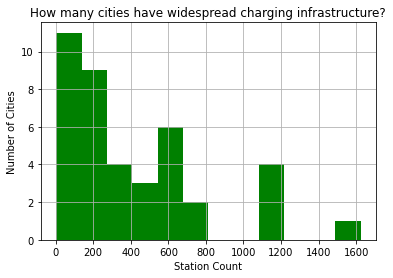

In [16]:
plt.hist(stations, bins=12, color='green')
plt.ylabel("Number of Cities")
plt.xlabel("Station Count")
plt.title("How many cities have widespread charging infrastructure?")
plt.grid(True)
plt.savefig("Results/station_ct_by_cities.png")
plt.show()


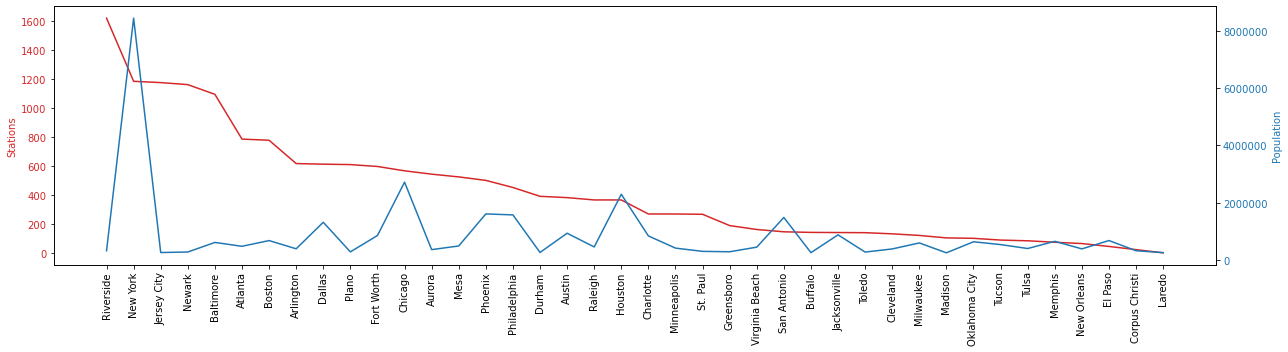

In [17]:
# Generate a figure comparing station count to population
fig, ax1 = plt.subplots(figsize=(18,5))

color = 'tab:red'
#ax1.set_xlabel("City")
ax1.set_ylabel("Stations", color=color)
ax1.plot(city_list_df["Clean_City"], stations, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(city_list_df["Clean_City"], population, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.ticklabel_format(axis='y', style='plain')

fig.tight_layout()
plt.savefig("Results/stations_v_population.png")
plt.show()

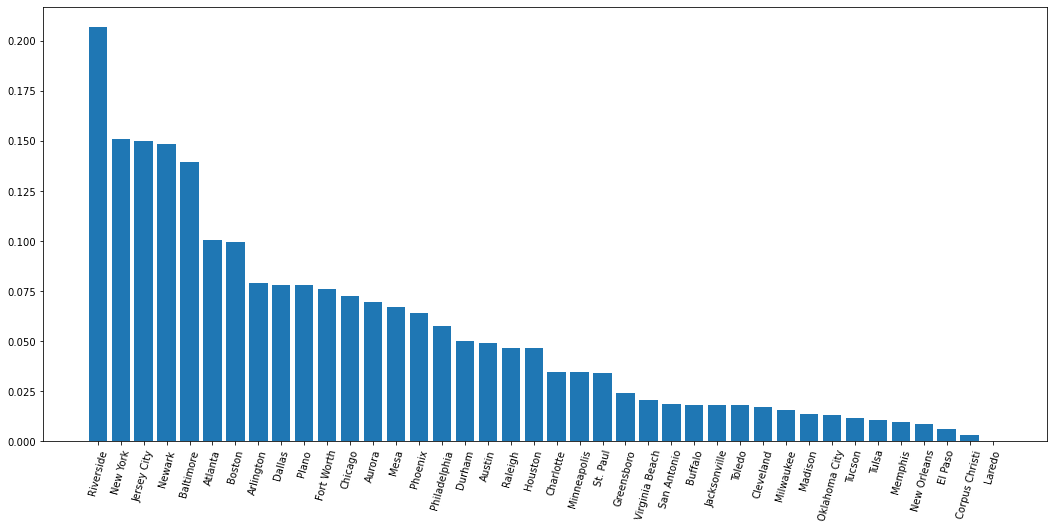

In [18]:
# Stations per mile graphic
plt.figure(figsize=(18,8))
plt.bar(city_list_df["Clean_City"], city_list_df["Stations per mile"])
plt.xticks(rotation=75)
plt.savefig("Results/stations_per_mile.png")
plt.show()